## Travel Insurance Prediction Data

## About Dataset

#### Context
* A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
* The New Insurance Package Also Includes Covid Cover.
* The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
* The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
* The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters Given Below.
* Image Credits-Unsplash(free to use)

#### Content
* Age- Age Of The Customer
* Employment Type- The Sector In Which Customer Is Employed
* GraduateOrNot- Whether The Customer Is College Graduate Or Not
* AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* FamilyMembers- Number Of Members In Customer's Family
* ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
* EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

#### Inspiration
* The Solution Offered By You May Be Used For Customer Specific Advertising Of The Package.
* Exploratory Data Analysis Performed On The Data Would Help Find Interesting Insights.
* Predict Whether A Given Customer Would Like To Buy The Insurance Package, Once The Corona Lockdown Ends And Travelling Resumes.
* Your Work Could Probably Help Save Thousands Of Rupees Of A Family.

---

#### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

#### Loading up the data

In [4]:
df = pd.read_csv("data/TravelInsurancePrediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Veri setimiz 1987 satırlı 10 özelliğe sahip bir yapıda. Bağımlı değişken (hedef) *TravelInsurance* sütunudur. Şimdi hedef değişkenimizin dağılım grafiğine bakalım.

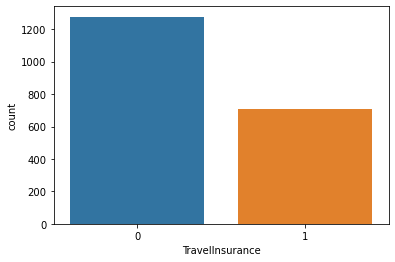

In [5]:
import seaborn as sns
#Hedef değişken dağılımı
sns.countplot(df['TravelInsurance']);

Şimdi bir veri setimiz ile iş sürecini değerlendirelim. Müşterilerin eğitim düzeyi veri analizi açısından önemli bir metrik fakat yeni bir seyehat sigortası açısından ML için gerekli olmadığını düşünüyorum. Ayrıca *Unnamed: 0* sütunuda bizim için anlamlı bir veri değil. Dolayısıyla bu iki sütunu veri setinden çıkarıyoruz.

In [6]:
df.drop(["Unnamed: 0", "GraduateOrNot"], axis=1, inplace=True)  # Veri setindeki bazı sütunları bırakıyoruz
                                                                # GraduateOrNot, sağlık sigortası yaparken kişilerin eğitim düzeyi önemli olmamalı
                                                                # Unnamed: 0, bir diğer anlamsız veri

In [7]:
df.head().T

,0,1,2,3,4
Age,31,31,34,28,28
Employment Type,Government Sector,Private Sector/Self Employed,Private Sector/Self Employed,Private Sector/Self Employed,Private Sector/Self Employed
AnnualIncome,400000,1250000,500000,700000,700000
FamilyMembers,6,7,4,3,8
ChronicDiseases,1,0,1,1,1
FrequentFlyer,No,No,No,No,Yes
EverTravelledAbroad,No,No,No,No,No
TravelInsurance,0,0,1,0,0


In [8]:
df.describe()   # Veri setinin temel istatistik değerlerini kontrol edelim
                # Verilerin istatistiksel değerlerinde bir aykırılık görünmüyor
                

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


#### Making the dataset all numerical

In [9]:
# Yes : 1 , No : 0 şeklinde bir değişim uyguluyoruz
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

# Government Sector : 1, Private Sector/Self Employed : 0 şeklinde bir değişim uyguluyoruz
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

In [10]:
# Veri setinin son haline göz atalım
df.head().T

,0,1,2,3,4
Age,31,31,34,28,28
Employment Type,1,0,0,0,0
AnnualIncome,400000,1250000,500000,700000,700000
FamilyMembers,6,7,4,3,8
ChronicDiseases,1,0,1,1,1
FrequentFlyer,0,0,0,0,1
EverTravelledAbroad,0,0,0,0,0
TravelInsurance,0,0,1,0,0


#### Splitting the data into training and test datasets

In [11]:
# X data
X = df.drop("TravelInsurance", axis=1)

In [34]:
X.head().T

,0,1,2,3,4
Age,31,31,34,28,28
Employment Type,1,0,0,0,0
AnnualIncome,400000,1250000,500000,700000,700000
FamilyMembers,6,7,4,3,8
ChronicDiseases,1,0,1,1,1
FrequentFlyer,0,0,0,0,1
EverTravelledAbroad,0,0,0,0,0


In [13]:
# y data
y = df["TravelInsurance"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [14]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
len(X_train), len(X_test)

(1589, 398)

### Machine Learning Benchmarking

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [17]:
# Değerlendirme metrikleri fonksiyonu
def print_binary_evaluation(y_true, y_pred):
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

#### Constant Model

In [18]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.3542713567839196,
 'recall': 1.0,
 'precision': 0.3542713567839196,
 'f1_score': 0.5231910946196661}

recall değerinin %100 olması hiç False Negative değeri olmadığı anlamına gelir. Yani herkesten geri dönüş alındığı anlamına gelir ki bu gerçekçi bir sonuç değildir.

#### Uniform Model

In [19]:
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.5150753768844221,
 'recall': 0.524822695035461,
 'precision': 0.37,
 'f1_score': 0.4340175953079179}

#### Stratified Strategy

In [20]:
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.5753768844221105,
 'recall': 0.40425531914893614,
 'precision': 0.4014084507042254,
 'f1_score': 0.4028268551236749}

#### Prior Strategy

In [21]:
dummy_clf = DummyClassifier(strategy='prior', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.6457286432160804,
 'recall': 0.0,
 'precision': 0.0,
 'f1_score': 0.0}

accuracy değeri burada %64 oldu fakat precision değeri %0 olması müşteri tahminimizin olmadığı anlamına gelir.

### Training the Model

#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression()
logit_clf.fit(X_train, y_train)
y_pred = logit_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.6457286432160804,
 'recall': 0.0,
 'precision': 0.0,
 'f1_score': 0.0}

#### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.8115577889447236,
 'recall': 0.6382978723404256,
 'precision': 0.7894736842105263,
 'f1_score': 0.7058823529411764}

#### KNeighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
dt_clf = KNeighborsClassifier(4)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.821608040201005,
 'recall': 0.5390070921985816,
 'precision': 0.926829268292683,
 'f1_score': 0.6816143497757848}

#### CatBoost Classifier

In [25]:
from catboost import CatBoostClassifier
dt_clf = CatBoostClassifier(iterations=10)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

Learning rate set to 0.5
0:	learn: 0.5406686	total: 163ms	remaining: 1.46s
1:	learn: 0.4887285	total: 168ms	remaining: 670ms
2:	learn: 0.4661983	total: 171ms	remaining: 399ms
3:	learn: 0.4502142	total: 174ms	remaining: 261ms
4:	learn: 0.4441521	total: 177ms	remaining: 177ms
5:	learn: 0.4361465	total: 179ms	remaining: 120ms
6:	learn: 0.4304888	total: 182ms	remaining: 78ms
7:	learn: 0.4246885	total: 184ms	remaining: 46.1ms
8:	learn: 0.4195860	total: 187ms	remaining: 20.8ms
9:	learn: 0.4150837	total: 189ms	remaining: 0us


{'accuracy': 0.8417085427135679,
 'recall': 0.5673758865248227,
 'precision': 0.975609756097561,
 'f1_score': 0.7174887892376682}

#### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.8090452261306532,
 'recall': 0.6524822695035462,
 'precision': 0.773109243697479,
 'f1_score': 0.7076923076923078}

<AxesSubplot:>

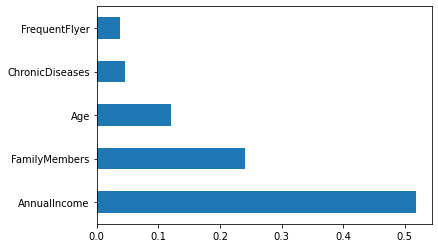

In [28]:
feat_importances = pd.Series(dt_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

#### Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

dt_clf = GradientBoostingClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.8442211055276382,
 'recall': 0.5673758865248227,
 'precision': 0.9876543209876543,
 'f1_score': 0.7207207207207208}